In [54]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [55]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('/content/BTC-USD.csv')
df1=df.reset_index()['Close']

In [56]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [57]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [58]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [59]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [60]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [61]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(60, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [62]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 3s 58ms/step - loss: 0.0562
Epoch 2/100
20/20 [==============================] - 1s 62ms/step - loss: 0.0098
Epoch 3/100
20/20 [==============================] - 2s 91ms/step - loss: 0.0019
Epoch 4/100
20/20 [==============================] - 2s 90ms/step - loss: 7.0196e-04
Epoch 5/100
20/20 [==============================] - 1s 55ms/step - loss: 6.5508e-04
Epoch 6/100
20/20 [==============================] - 1s 58ms/step - loss: 6.0094e-04
Epoch 7/100
20/20 [==============================] - 1s 59ms/step - loss: 5.8323e-04
Epoch 8/100
20/20 [==============================] - 1s 58ms/step - loss: 5.6772e-04
Epoch 9/100
20/20 [==============================] - 1s 58ms/step - loss: 5.4785e-04
Epoch 10/100
20/20 [==============================] - 1s 59ms/step - loss: 5.3934e-04
Epoch 11/100
20/20 [==============================] - 1s 61ms/step - loss: 5.1846e-04
Epoch 12/100
20/20 [==============================] - 1s 62ms/step - loss: 

In [63]:
# 10. Dự đoán trên tập train và test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 13ms/step


In [64]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [65]:
# 12. Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mse = np.mean((np.array(ytest) - np.array(y_pred))**2)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)

Testing RMSE: 41349.49163055235
Testing MAPE: 8854436.854184156
Testing MSE: 1709780458.1051192


In [66]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.67756889 0.68967404 0.69201294 0.73224787 0.76921984 0.84739737
 0.82855187 0.84647189 0.84054613 0.85695541 0.93143461 0.86609866
 0.89935805 0.91116787 0.93099723 0.93386485 0.94137915 0.98615743
 0.97688739 1.         0.97566562 0.9469183  0.88793761 0.93230318
 0.9201565  0.83885728 0.92542292 0.89048043 0.86577499 0.86986376
 0.91562083 0.95492499 0.95534366 0.94766222 0.96626542 0.95397313
 0.9504025  0.97475761 0.95122249 0.88983968 0.89754056 0.93400854
 0.92432613 0.93959502 0.9463237  0.97905222 0.94309905 0.96399961
 0.95639345 0.91506827 0.86639112 0.89404836 0.86068929 0.8662525
 0.82968151 0.86193771 0.86670989 0.88331172 0.88233372 0.90990125
 0.90369245 0.87296084 0.87591529 0.86543684 0.8605873  0.85617441
 0.86667455 0.82045159 0.78607801 0.7986198  0.85295184 0.8674009
 0.86941556 0.8568772  0.84494544 0.82840125 0.85526172 0.82270083
 0.8227143  0.8321584  0.85311937 0.83366434 0.90167604 0.88673257
 0.91299111 0.91138888 0.90183292 0.97641    0.95748

In [67]:
# 13. Dự báo 60 ngày tiếp theo
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

0 day input [0.67756889 0.68967404 0.69201294 0.73224787 0.76921984 0.84739737
 0.82855187 0.84647189 0.84054613 0.85695541 0.93143461 0.86609866
 0.89935805 0.91116787 0.93099723 0.93386485 0.94137915 0.98615743
 0.97688739 1.         0.97566562 0.9469183  0.88793761 0.93230318
 0.9201565  0.83885728 0.92542292 0.89048043 0.86577499 0.86986376
 0.91562083 0.95492499 0.95534366 0.94766222 0.96626542 0.95397313
 0.9504025  0.97475761 0.95122249 0.88983968 0.89754056 0.93400854
 0.92432613 0.93959502 0.9463237  0.97905222 0.94309905 0.96399961
 0.95639345 0.91506827 0.86639112 0.89404836 0.86068929 0.8662525
 0.82968151 0.86193771 0.86670989 0.88331172 0.88233372 0.90990125
 0.90369245 0.87296084 0.87591529 0.86543684 0.8605873  0.85617441
 0.86667455 0.82045159 0.78607801 0.7986198  0.85295184 0.8674009
 0.86941556 0.8568772  0.84494544 0.82840125 0.85526172 0.82270083
 0.8227143  0.8321584  0.85311937 0.83366434 0.90167604 0.88673257
 0.91299111 0.91138888 0.90183292 0.97641    0.95748

In [68]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

0 day input [0.67756889 0.68967404 0.69201294 0.73224787 0.76921984 0.84739737
 0.82855187 0.84647189 0.84054613 0.85695541 0.93143461 0.86609866
 0.89935805 0.91116787 0.93099723 0.93386485 0.94137915 0.98615743
 0.97688739 1.         0.97566562 0.9469183  0.88793761 0.93230318
 0.9201565  0.83885728 0.92542292 0.89048043 0.86577499 0.86986376
 0.91562083 0.95492499 0.95534366 0.94766222 0.96626542 0.95397313
 0.9504025  0.97475761 0.95122249 0.88983968 0.89754056 0.93400854
 0.92432613 0.93959502 0.9463237  0.97905222 0.94309905 0.96399961
 0.95639345 0.91506827 0.86639112 0.89404836 0.86068929 0.8662525
 0.82968151 0.86193771 0.86670989 0.88331172 0.88233372 0.90990125
 0.90369245 0.87296084 0.87591529 0.86543684 0.8605873  0.85617441
 0.86667455 0.82045159 0.78607801 0.7986198  0.85295184 0.8674009
 0.86941556 0.8568772  0.84494544 0.82840125 0.85526172 0.82270083
 0.8227143  0.8321584  0.85311937 0.83366434 0.90167604 0.88673257
 0.91299111 0.91138888 0.90183292 0.97641    0.95748

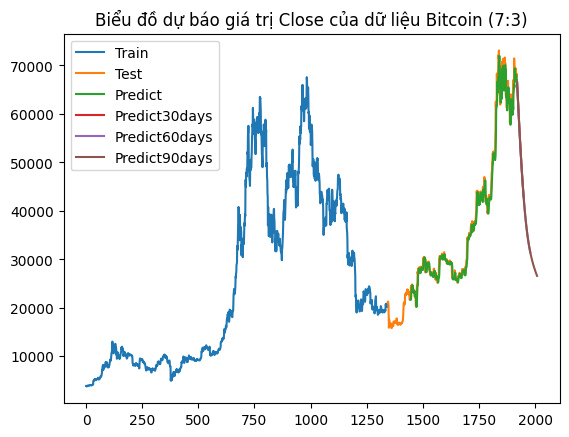

In [69]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
predict_data_index_60 = pd.RangeIndex(start=len(df1), stop=len(df1)+60, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output_60))
predict_data_index_90 = pd.RangeIndex(start=len(df1), stop=len(df1)+90, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title("Biểu đồ dự báo giá trị Close của dữ liệu Bitcoin (7:3)")
plt.show()

In [70]:
train_size_82 = int(0.8 * len(df1))
test_size_82 = len(df1) - train_size_82
train_data_82 = df1[:train_size_82]
test_data_82 = df1[train_size_82:train_size_82+test_size_82]

In [71]:
X_train_82, y_train_82 = create_dataset(train_data_82, time_step)
X_test_82, ytest_82 = create_dataset(test_data_82, time_step)

In [72]:
X_train_82 =X_train_82.reshape(X_train_82.shape[0],X_train_82.shape[1] , 1)
X_test_82 = X_test_82.reshape(X_test_82.shape[0],X_test_82.shape[1] , 1)

In [73]:
model.fit(X_train_82,y_train_82,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 1s 60ms/step - loss: 2.9290e-04
Epoch 2/100
23/23 [==============================] - 1s 61ms/step - loss: 2.8495e-04
Epoch 3/100
23/23 [==============================] - 1s 57ms/step - loss: 2.9180e-04
Epoch 4/100
23/23 [==============================] - 2s 76ms/step - loss: 2.8389e-04
Epoch 5/100
23/23 [==============================] - 2s 91ms/step - loss: 2.8125e-04
Epoch 6/100
23/23 [==============================] - 2s 78ms/step - loss: 2.9433e-04
Epoch 7/100
23/23 [==============================] - 1s 54ms/step - loss: 2.8941e-04
Epoch 8/100
23/23 [==============================] - 1s 55ms/step - loss: 3.0158e-04
Epoch 9/100
23/23 [==============================] - 1s 58ms/step - loss: 3.0580e-04
Epoch 10/100
23/23 [==============================] - 1s 56ms/step - loss: 3.3132e-04
Epoch 11/100
23/23 [==============================] - 1s 59ms/step - loss: 2.8806e-04
Epoch 12/100
23/23 [==============================] - 1s 60ms/s

In [74]:
train_predict_82=model.predict(X_train_82)
y_pred_82=model.predict(X_test_82)

9/9 [==============================] - 0s 19ms/step


In [75]:
train_predict_82=scaler.inverse_transform(train_predict_82)
y_pred_82=scaler.inverse_transform(y_pred_82)

In [76]:
test_82_rmse = np.sqrt(np.mean((y_pred_82 - ytest_82)**2))
test_82_mape = np.mean(np.abs((ytest_82 - y_pred_82) / ytest_82)) * 100
test_82_mse = np.mean((np.array(ytest_82) - np.array(y_pred_82))**2)
print('Testing RMSE:', test_82_rmse)
print('Testing MAPE:', test_82_mape)
print('Testing MSE:', test_82_mse)

Testing RMSE: 48991.02273571515
Testing MAPE: 8625730.582812767
Testing MSE: 2400120308.691359


In [77]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.67756889 0.68967404 0.69201294 0.73224787 0.76921984 0.84739737
 0.82855187 0.84647189 0.84054613 0.85695541 0.93143461 0.86609866
 0.89935805 0.91116787 0.93099723 0.93386485 0.94137915 0.98615743
 0.97688739 1.         0.97566562 0.9469183  0.88793761 0.93230318
 0.9201565  0.83885728 0.92542292 0.89048043 0.86577499 0.86986376
 0.91562083 0.95492499 0.95534366 0.94766222 0.96626542 0.95397313
 0.9504025  0.97475761 0.95122249 0.88983968 0.89754056 0.93400854
 0.92432613 0.93959502 0.9463237  0.97905222 0.94309905 0.96399961
 0.95639345 0.91506827 0.86639112 0.89404836 0.86068929 0.8662525
 0.82968151 0.86193771 0.86670989 0.88331172 0.88233372 0.90990125
 0.90369245 0.87296084 0.87591529 0.86543684 0.8605873  0.85617441
 0.86667455 0.82045159 0.78607801 0.7986198  0.85295184 0.8674009
 0.86941556 0.8568772  0.84494544 0.82840125 0.85526172 0.82270083
 0.8227143  0.8321584  0.85311937 0.83366434 0.90167604 0.88673257
 0.91299111 0.91138888 0.90183292 0.97641    0.95748

In [78]:
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

0 day input [0.67756889 0.68967404 0.69201294 0.73224787 0.76921984 0.84739737
 0.82855187 0.84647189 0.84054613 0.85695541 0.93143461 0.86609866
 0.89935805 0.91116787 0.93099723 0.93386485 0.94137915 0.98615743
 0.97688739 1.         0.97566562 0.9469183  0.88793761 0.93230318
 0.9201565  0.83885728 0.92542292 0.89048043 0.86577499 0.86986376
 0.91562083 0.95492499 0.95534366 0.94766222 0.96626542 0.95397313
 0.9504025  0.97475761 0.95122249 0.88983968 0.89754056 0.93400854
 0.92432613 0.93959502 0.9463237  0.97905222 0.94309905 0.96399961
 0.95639345 0.91506827 0.86639112 0.89404836 0.86068929 0.8662525
 0.82968151 0.86193771 0.86670989 0.88331172 0.88233372 0.90990125
 0.90369245 0.87296084 0.87591529 0.86543684 0.8605873  0.85617441
 0.86667455 0.82045159 0.78607801 0.7986198  0.85295184 0.8674009
 0.86941556 0.8568772  0.84494544 0.82840125 0.85526172 0.82270083
 0.8227143  0.8321584  0.85311937 0.83366434 0.90167604 0.88673257
 0.91299111 0.91138888 0.90183292 0.97641    0.95748

In [79]:
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

0 day input [0.67756889 0.68967404 0.69201294 0.73224787 0.76921984 0.84739737
 0.82855187 0.84647189 0.84054613 0.85695541 0.93143461 0.86609866
 0.89935805 0.91116787 0.93099723 0.93386485 0.94137915 0.98615743
 0.97688739 1.         0.97566562 0.9469183  0.88793761 0.93230318
 0.9201565  0.83885728 0.92542292 0.89048043 0.86577499 0.86986376
 0.91562083 0.95492499 0.95534366 0.94766222 0.96626542 0.95397313
 0.9504025  0.97475761 0.95122249 0.88983968 0.89754056 0.93400854
 0.92432613 0.93959502 0.9463237  0.97905222 0.94309905 0.96399961
 0.95639345 0.91506827 0.86639112 0.89404836 0.86068929 0.8662525
 0.82968151 0.86193771 0.86670989 0.88331172 0.88233372 0.90990125
 0.90369245 0.87296084 0.87591529 0.86543684 0.8605873  0.85617441
 0.86667455 0.82045159 0.78607801 0.7986198  0.85295184 0.8674009
 0.86941556 0.8568772  0.84494544 0.82840125 0.85526172 0.82270083
 0.8227143  0.8321584  0.85311937 0.83366434 0.90167604 0.88673257
 0.91299111 0.91138888 0.90183292 0.97641    0.95748

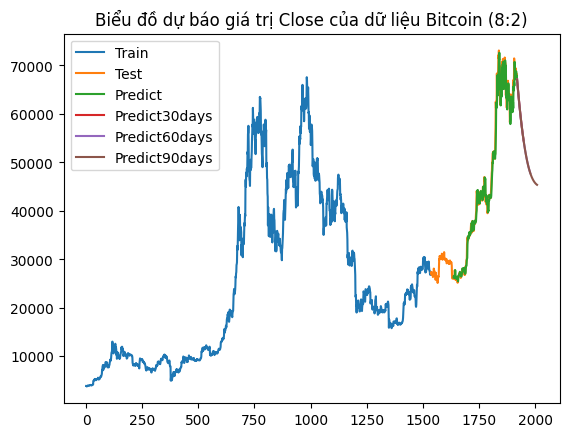

In [80]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_82, step=1)
plt.plot(scaler.inverse_transform(train_data_82))
test_data_index = pd.RangeIndex(start=train_size_82, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_82))
test_data_index = pd.RangeIndex(start=train_size_82+101, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,(y_pred_82))
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
prediect_data_index_60 = pd.RangeIndex(start=len(df1), stop=len(df1)+60, step=1)
plt.plot(prediect_data_index_60,scaler.inverse_transform(lst_output_60))
prediect_data_index_90 = pd.RangeIndex(start=len(df1), stop=len(df1)+90, step=1)
plt.plot(prediect_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title("Biểu đồ dự báo giá trị Close của dữ liệu Bitcoin (8:2)")
plt.show()

In [81]:
train_size_91 = int(0.9 * len(df1))
test_size_91 = len(df1) - train_size_91
train_data_91 = df1[:train_size_91]
test_data_91 = df1[train_size_91:train_size_91+test_size_91]

In [82]:
X_train_91, y_train_91 = create_dataset(train_data_91, time_step)
X_test_91, ytest_91 = create_dataset(test_data_91, time_step)

In [83]:
X_train_91 =X_train_91.reshape(X_train_91.shape[0],X_train_91.shape[1] , 1)
X_test_91 = X_test_91.reshape(X_test_91.shape[0],X_test_91.shape[1] , 1)

In [84]:
model.fit(X_train_91,y_train_91,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 1s 52ms/step - loss: 2.5346e-04
Epoch 2/100
26/26 [==============================] - 1s 56ms/step - loss: 2.6320e-04
Epoch 3/100
26/26 [==============================] - 2s 59ms/step - loss: 2.7669e-04
Epoch 4/100
26/26 [==============================] - 2s 69ms/step - loss: 2.5886e-04
Epoch 5/100
26/26 [==============================] - 2s 92ms/step - loss: 2.6280e-04
Epoch 6/100
26/26 [==============================] - 2s 79ms/step - loss: 2.6015e-04
Epoch 7/100
26/26 [==============================] - 1s 55ms/step - loss: 2.5116e-04
Epoch 8/100
26/26 [==============================] - 1s 57ms/step - loss: 2.5093e-04
Epoch 9/100
26/26 [==============================] - 2s 59ms/step - loss: 2.5320e-04
Epoch 10/100
26/26 [==============================] - 2s 58ms/step - loss: 2.6817e-04
Epoch 11/100
26/26 [==============================] - 2s 59ms/step - loss: 2.6670e-04
Epoch 12/100
26/26 [==============================] - 2s 57ms/s

In [85]:
train_predict_91=model.predict(X_train_91)
y_pred_91=model.predict(X_test_91)

3/3 [==============================] - 0s 22ms/step


In [86]:
train_predict_91=scaler.inverse_transform(train_predict_91)
y_pred_91=scaler.inverse_transform(y_pred_91)

In [87]:
test_91_rmse = np.sqrt(np.mean((y_pred_91 - ytest_91)**2))
test_91_mape = np.mean(np.abs((ytest_91 - y_pred_91) / ytest_91)) * 100
test_91_mse = np.mean((np.array(ytest_91) - np.array(y_pred_91))**2)
print('Testing RMSE:', test_91_rmse)
print('Testing MAPE:', test_91_mape)
print('Testing MSE:', test_91_mse)

Testing RMSE: 66559.3138117082
Testing MAPE: 7386154.864308606
Testing MSE: 4430142255.085449


In [88]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.67756889 0.68967404 0.69201294 0.73224787 0.76921984 0.84739737
 0.82855187 0.84647189 0.84054613 0.85695541 0.93143461 0.86609866
 0.89935805 0.91116787 0.93099723 0.93386485 0.94137915 0.98615743
 0.97688739 1.         0.97566562 0.9469183  0.88793761 0.93230318
 0.9201565  0.83885728 0.92542292 0.89048043 0.86577499 0.86986376
 0.91562083 0.95492499 0.95534366 0.94766222 0.96626542 0.95397313
 0.9504025  0.97475761 0.95122249 0.88983968 0.89754056 0.93400854
 0.92432613 0.93959502 0.9463237  0.97905222 0.94309905 0.96399961
 0.95639345 0.91506827 0.86639112 0.89404836 0.86068929 0.8662525
 0.82968151 0.86193771 0.86670989 0.88331172 0.88233372 0.90990125
 0.90369245 0.87296084 0.87591529 0.86543684 0.8605873  0.85617441
 0.86667455 0.82045159 0.78607801 0.7986198  0.85295184 0.8674009
 0.86941556 0.8568772  0.84494544 0.82840125 0.85526172 0.82270083
 0.8227143  0.8321584  0.85311937 0.83366434 0.90167604 0.88673257
 0.91299111 0.91138888 0.90183292 0.97641    0.95748

In [89]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

0 day input [0.67756889 0.68967404 0.69201294 0.73224787 0.76921984 0.84739737
 0.82855187 0.84647189 0.84054613 0.85695541 0.93143461 0.86609866
 0.89935805 0.91116787 0.93099723 0.93386485 0.94137915 0.98615743
 0.97688739 1.         0.97566562 0.9469183  0.88793761 0.93230318
 0.9201565  0.83885728 0.92542292 0.89048043 0.86577499 0.86986376
 0.91562083 0.95492499 0.95534366 0.94766222 0.96626542 0.95397313
 0.9504025  0.97475761 0.95122249 0.88983968 0.89754056 0.93400854
 0.92432613 0.93959502 0.9463237  0.97905222 0.94309905 0.96399961
 0.95639345 0.91506827 0.86639112 0.89404836 0.86068929 0.8662525
 0.82968151 0.86193771 0.86670989 0.88331172 0.88233372 0.90990125
 0.90369245 0.87296084 0.87591529 0.86543684 0.8605873  0.85617441
 0.86667455 0.82045159 0.78607801 0.7986198  0.85295184 0.8674009
 0.86941556 0.8568772  0.84494544 0.82840125 0.85526172 0.82270083
 0.8227143  0.8321584  0.85311937 0.83366434 0.90167604 0.88673257
 0.91299111 0.91138888 0.90183292 0.97641    0.95748

In [90]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

0 day input [0.67756889 0.68967404 0.69201294 0.73224787 0.76921984 0.84739737
 0.82855187 0.84647189 0.84054613 0.85695541 0.93143461 0.86609866
 0.89935805 0.91116787 0.93099723 0.93386485 0.94137915 0.98615743
 0.97688739 1.         0.97566562 0.9469183  0.88793761 0.93230318
 0.9201565  0.83885728 0.92542292 0.89048043 0.86577499 0.86986376
 0.91562083 0.95492499 0.95534366 0.94766222 0.96626542 0.95397313
 0.9504025  0.97475761 0.95122249 0.88983968 0.89754056 0.93400854
 0.92432613 0.93959502 0.9463237  0.97905222 0.94309905 0.96399961
 0.95639345 0.91506827 0.86639112 0.89404836 0.86068929 0.8662525
 0.82968151 0.86193771 0.86670989 0.88331172 0.88233372 0.90990125
 0.90369245 0.87296084 0.87591529 0.86543684 0.8605873  0.85617441
 0.86667455 0.82045159 0.78607801 0.7986198  0.85295184 0.8674009
 0.86941556 0.8568772  0.84494544 0.82840125 0.85526172 0.82270083
 0.8227143  0.8321584  0.85311937 0.83366434 0.90167604 0.88673257
 0.91299111 0.91138888 0.90183292 0.97641    0.95748

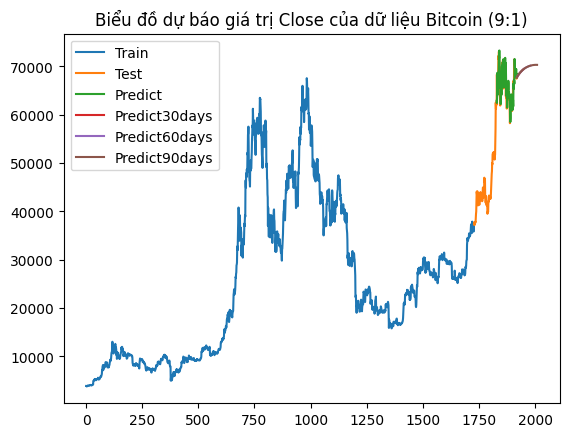

In [91]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_91, step=1)
plt.plot(scaler.inverse_transform(train_data_91))
test_data_index = pd.RangeIndex(start=train_size_91, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_91))
test_data_index = pd.RangeIndex(start=train_size_91+101, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,(y_pred_91))
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
predict_data_index_60 = pd.RangeIndex(start=len(df1), stop=len(df1)+60, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output_60))
predict_data_index_90 = pd.RangeIndex(start=len(df1), stop=len(df1)+90, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title("Biểu đồ dự báo giá trị Close của dữ liệu Bitcoin (9:1)")
plt.show()